<a href="https://colab.research.google.com/github/Refierbi/Refierbi/blob/main/Refierbi_ibro__tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cosine Similarity, Validation and Affinage (fine tunning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cross-Validation Scores: [1. 1.]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Best Parameters: {'max_depth': None, 'n_estimators': 50}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



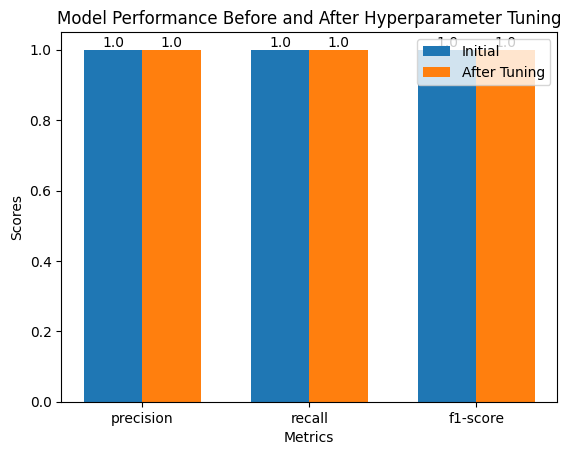

In [ ]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download NLTK data files (first-time use)
nltk.download('punkt')

# Function to read text from a file
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except UnicodeDecodeError:
        try:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                return file.read()
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                return file.read()

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
]

# Read texts from all files
documents = [read_text_file(file_path) for file_path in text_file_paths]

# Vectorize the documents using TF-IDF representation
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Validation (cross-validation) example for a hypothetical classification task
# Assuming you have labels and a classification model
if len(documents) > 2:
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, [0, 1, 1], test_size=0.3, random_state=42)
    model = RandomForestClassifier()

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # Use cv=2 for 2 samples
    print(f"Cross-Validation Scores: {cv_scores}")

    # Fit and predict
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Assuming you have true labels for the test set
    true_labels = [1]  # Replace with actual labels
    initial_report = classification_report(true_labels, predictions, output_dict=True)
    print(classification_report(true_labels, predictions))

    # Fine-Tuning (Affinage)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)  # Use cv=2
    grid_search.fit(X_train, y_train)

    print(f"Best Parameters: {grid_search.best_params_}")

    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    best_predictions = best_model.predict(X_test)
    best_report = classification_report(true_labels, best_predictions, output_dict=True)
    print(classification_report(true_labels, best_predictions))

    # Plotting the results
    labels = ['precision', 'recall', 'f1-score']
    initial_scores = [initial_report['1'][metric] for metric in labels]
    best_scores = [best_report['1'][metric] for metric in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, initial_scores, width, label='Initial')
    bars2 = ax.bar(x + width/2, best_scores, width, label='After Tuning')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Before and After Hyperparameter Tuning')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for bar in bars1 + bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.show()
else:
    print("Not enough samples for cross-validation.")


In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download NLTK data files (first-time use)
nltk.download('punkt')

# Function to read text from a file
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except UnicodeDecodeError:
        try:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                return file.read()
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                return file.read()

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
]

# Read texts from all files
documents = [read_text_file(file_path) for file_path in text_file_paths]

# Vectorize the documents using TF-IDF representation
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Create DataFrame for cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=text_file_paths, columns=text_file_paths)

# Path to the output CSV file in Google Drive
output_csv_path = '/content/drive/MyDrive/AresultatCosineSimilarity.csv'
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
cosine_sim_df.to_csv(output_csv_path, index=True)

print(f"Cosine similarity results saved to {output_csv_path}")

# Validation (cross-validation) example for a hypothetical classification task
# Assuming you have labels and a classification model
# Example: RandomForestClassifier
# Ensure you have at least as many samples as cross-validation splits
if len(documents) > 2:
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, [0, 1, 1], test_size=0.3, random_state=42)
    model = RandomForestClassifier()

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # Use cv=2 for 2 samples
    print(f"Cross-Validation Scores: {cv_scores}")

    # Fit and predict
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Assuming you have true labels for the test set
    from sklearn.metrics import classification_report
    true_labels = [1]  # Replace with actual labels
    print(classification_report(true_labels, predictions))

    # Fine-Tuning (Affinage)
    # Example: Grid Search for Hyperparameter Tuning
    from sklearn.model_selection import GridSearchCV

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)  # Use cv=2
    grid_search.fit(X_train, y_train)

    print(f"Best Parameters: {grid_search.best_params_}")

    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    best_predictions = best_model.predict(X_test)
    print(classification_report(true_labels, best_predictions))
else:
    print("Not enough samples for cross-validation.")


Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cosine similarity results saved to /content/drive/MyDrive/AresultatCosineSimilarity.csv
Cross-Validation Scores: [1. 1.]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Best Parameters: {'max_depth': None, 'n_estimators': 50}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



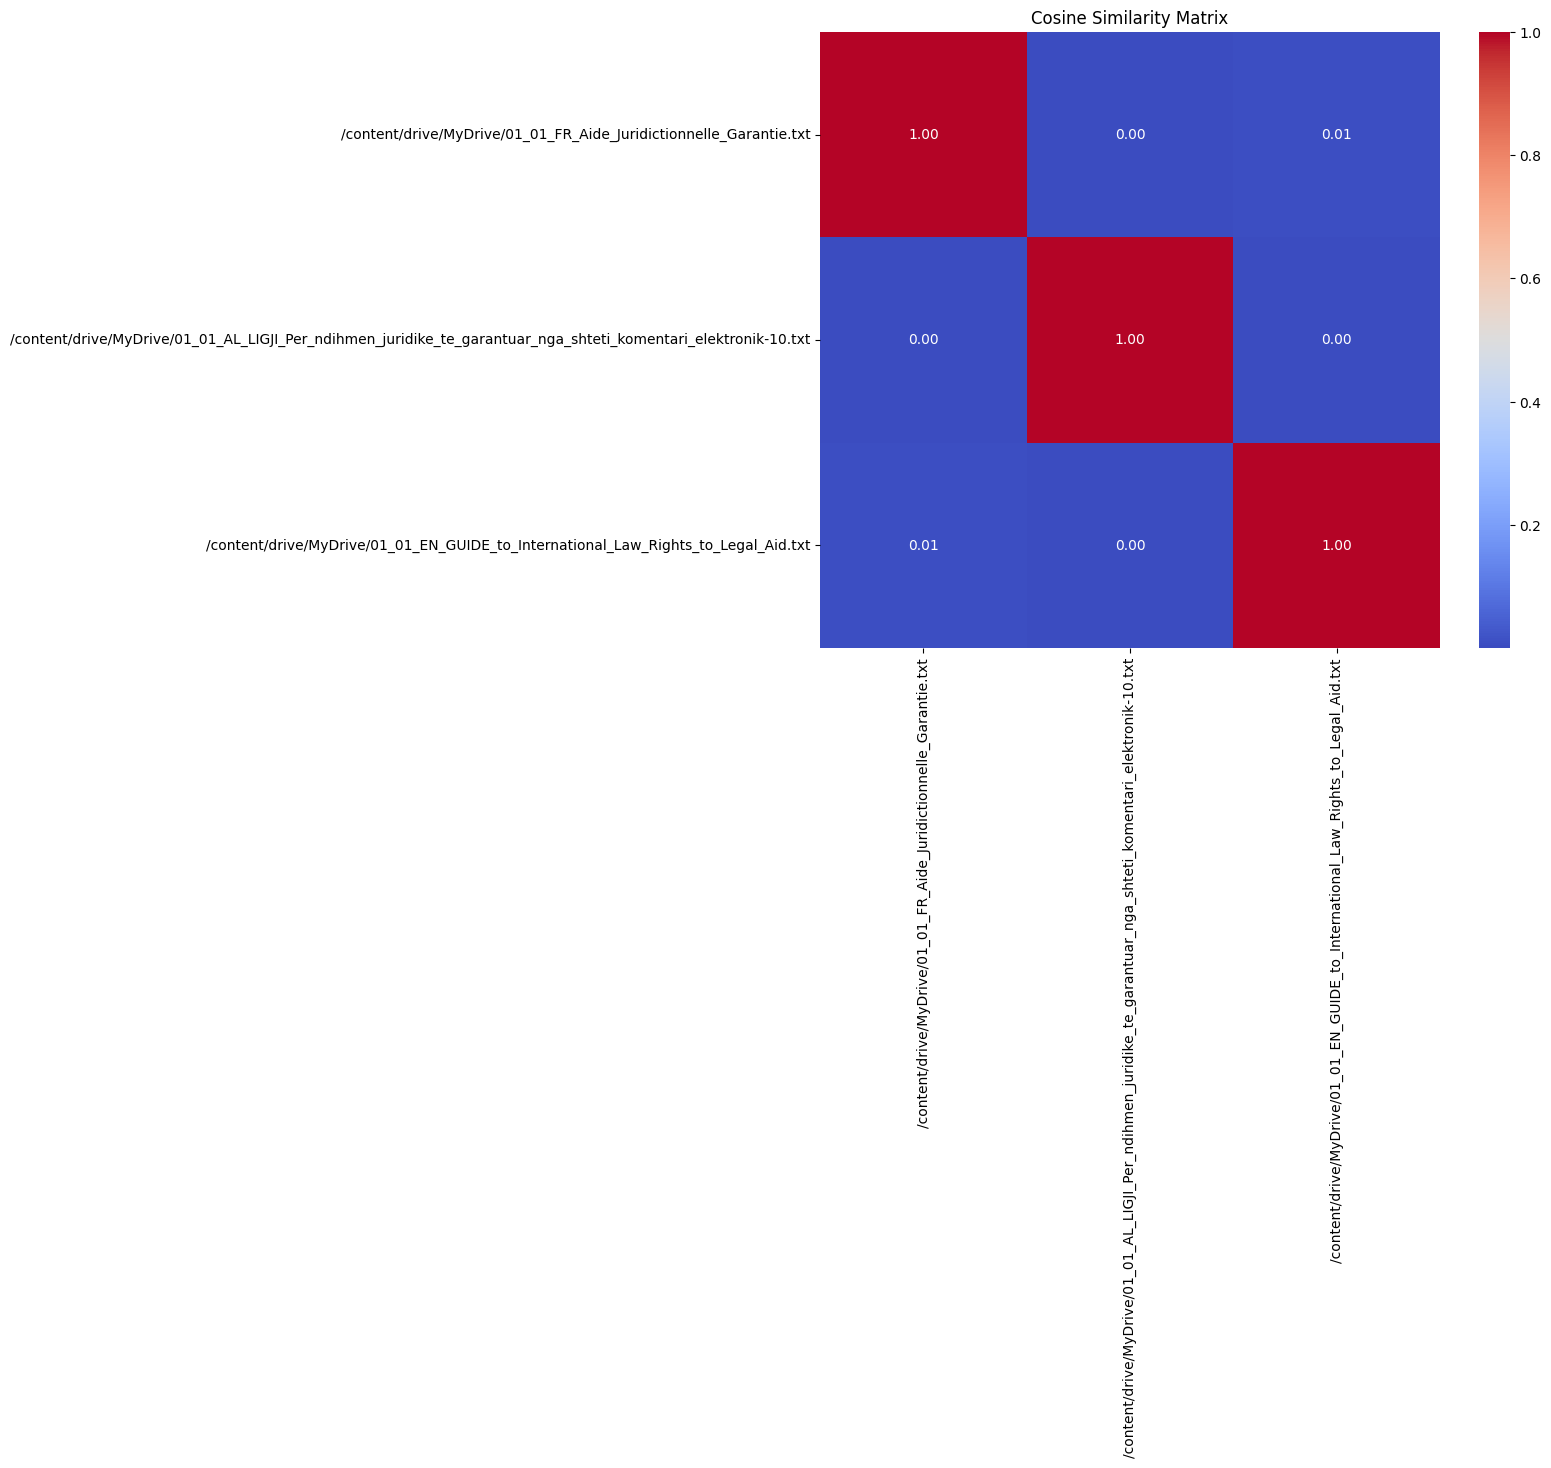

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cosine similarity matrix from the CSV file
cosine_sim_df = pd.read_csv('/content/drive/MyDrive/AresultatCosineSimilarity.csv', index_col=0)

# Create a heatmap for cosine similarity
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cosine Similarity Matrix')
plt.show()


Jaccard

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
import os
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download NLTK data files (first-time use)
nltk.download('punkt')

# Function to read text from a file
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except UnicodeDecodeError:
        try:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                return file.read()
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                return file.read()

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
]

# Read texts from all files
documents = [read_text_file(file_path) for file_path in text_file_paths]

# Vectorize the documents using binary representation
vectorizer = CountVectorizer(binary=True)
binary_matrix = vectorizer.fit_transform(documents).toarray()

# Initialize a DataFrame to store Jaccard similarities
jaccard_sim_df = pd.DataFrame(np.ones((len(documents), len(documents))), index=text_file_paths, columns=text_file_paths)

# Compute Jaccard similarity between each pair of documents
for i in range(len(documents)):
    for j in range(len(documents)):
        if i != j:
            similarity = jaccard_score(binary_matrix[i], binary_matrix[j], average='binary')
            jaccard_sim_df.iloc[i, j] = similarity

# Path to the output CSV file in Google Drive
output_csv_path = '/content/drive/MyDrive/AresultatJaccardSimilarity.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)

# Save the DataFrame to a CSV file
jaccard_sim_df.to_csv(output_csv_path, index=True)

print(f"Jaccard similarity results saved to {output_csv_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Jaccard similarity results saved to /content/drive/MyDrive/AresultatJaccardSimilarity.csv


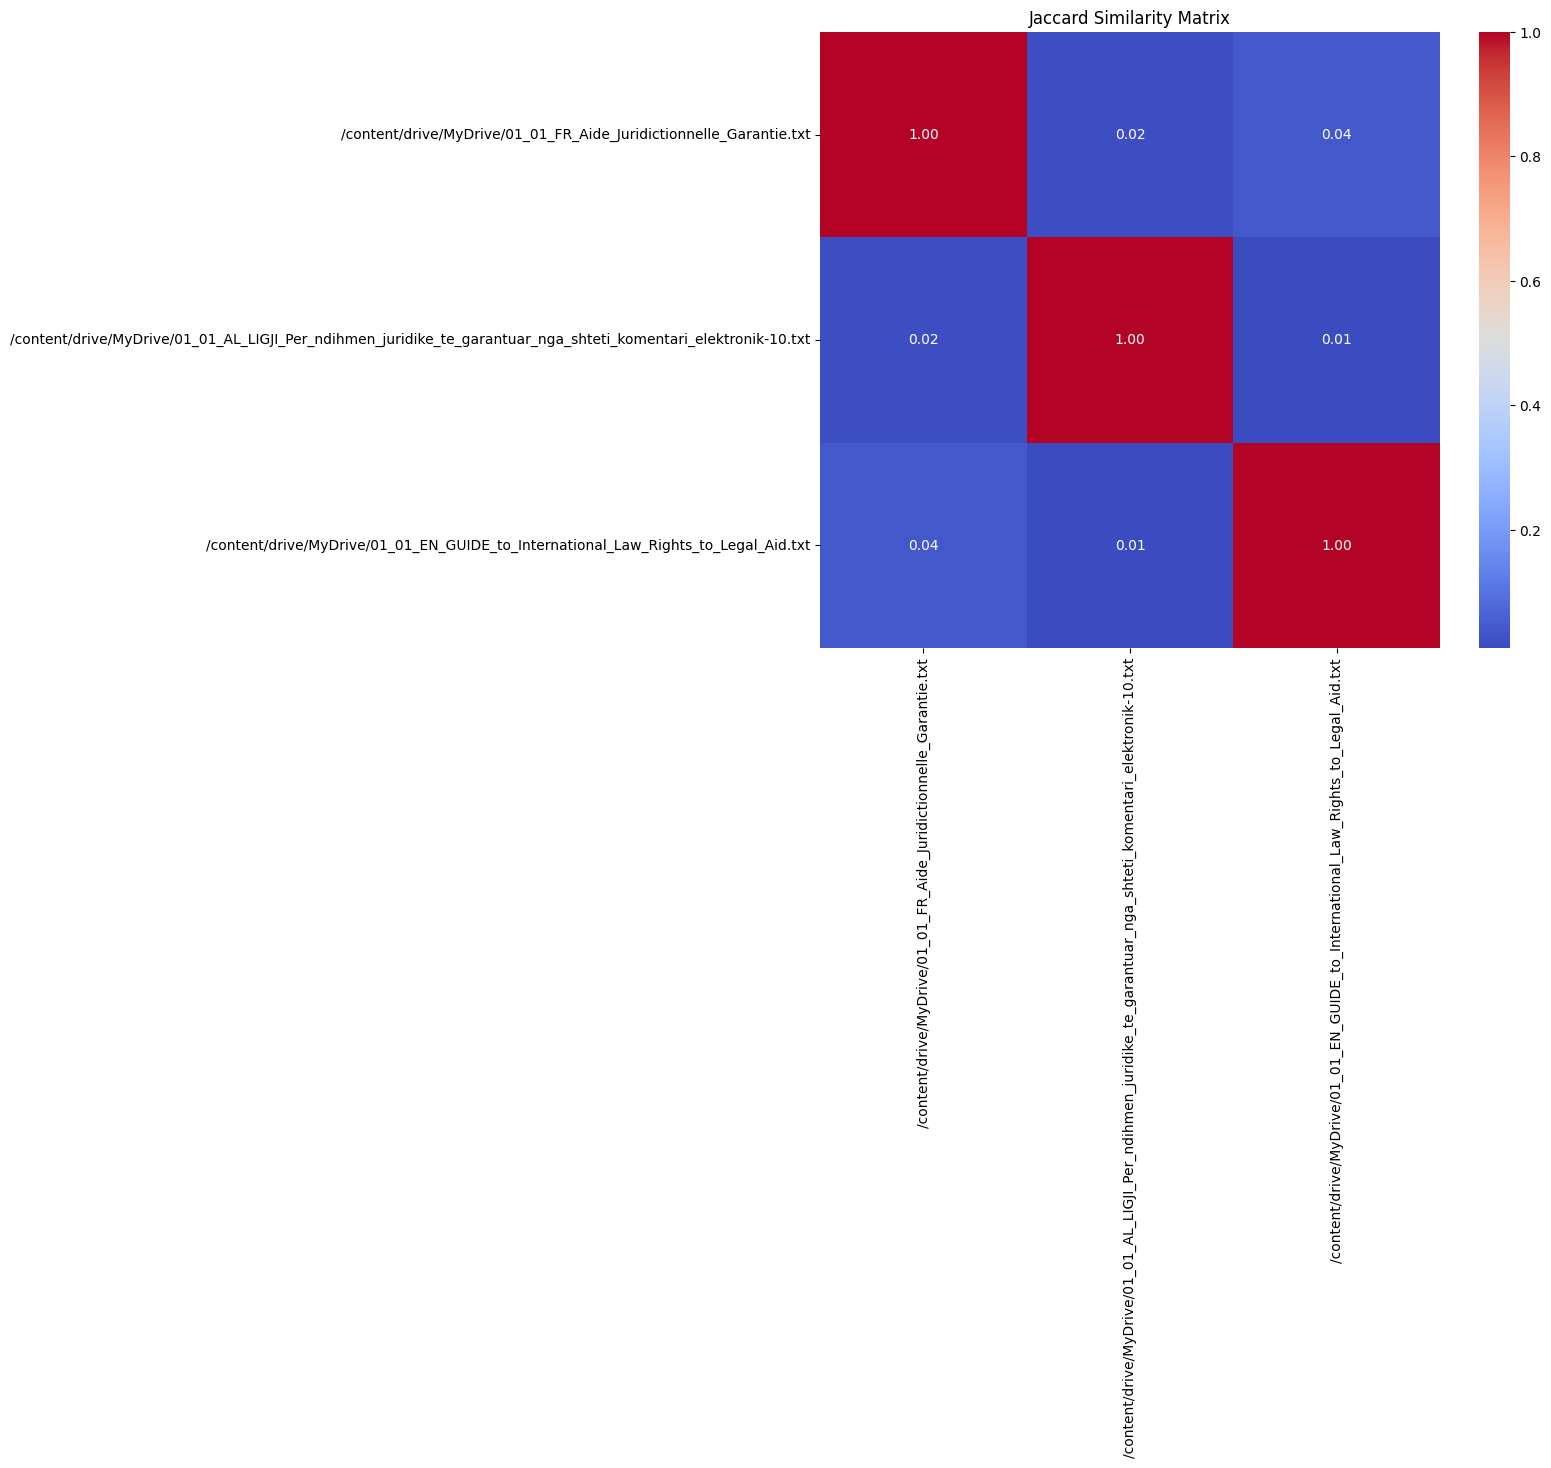

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Jaccard similarity matrix from the CSV file
jaccard_sim_df = pd.read_csv('/content/drive/MyDrive/AresultatJaccardSimilarity.csv', index_col=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_sim_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Jaccard Similarity Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download NLTK data files (first-time use)
nltk.download('punkt')

# Function to read text from a file with improved error handling
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            text = file.read()
    return text

# Function to tokenize text
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Function to vectorize tokens and compute TF-IDF
def compute_tfidf(tokens):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([' '.join(tokens)])
    return vectorizer, tfidf_matrix

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/02_01_EN_The_Civil_Procedure_Rules.txt',
    '/content/drive/MyDrive/02_01_FR_Code_de_Procedure_Civile.txt',
    '/content/drive/MyDrive/02_01_AL_Kodi_i_procedures_civile_i_Republikes_se_Shqiperise-14.txt',
    '/content/drive/MyDrive/03_01_AL_Kodi_i_procedures_penale_i_Republikes_se_Shqiperise-12.txt',
    '/content/drive/MyDrive/03_01_EN_The_Criminal_Procedure_Rules_2020.txt',
    '/content/drive/MyDrive/03_01_FR_CODE_DE_PROCÉDURE_PÉNALE.txt',
]

# Combine text from all files
combined_text = ""
for file_path in text_file_paths:
    combined_text += read_text_file(file_path) + " "

# Tokenize the combined text
tokens = tokenize_text(combined_text)

# Compute TF-IDF
vectorizer, tfidf_matrix = compute_tfidf(tokens)

# Get feature names and TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().flatten()

# Create a DataFrame
df = pd.DataFrame({'Token': feature_names, 'TF-IDF Score': tfidf_scores})

# Path to the output CSV file in Google Drive
output_csv_path = '/content/drive/MyDrive/AresultatTF-IDF.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)

print(f"TF-IDF results saved to {output_csv_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TF-IDF results saved to /content/drive/MyDrive/AresultatTF-IDF.csv


COSINE SIMILARITY


In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download NLTK data files (first-time use)
nltk.download('punkt')

# Function to read text from a file with improved error handling
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        try:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                text = file.read()
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                text = file.read()
    return text

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/02_01_EN_The_Civil_Procedure_Rules.txt',
    '/content/drive/MyDrive/02_01_FR_Code_de_Procedure_Civile.txt',
    '/content/drive/MyDrive/02_01_AL_Kodi_i_procedures_civile_i_Republikes_se_Shqiperise-14.txt',
    '/content/drive/MyDrive/03_01_AL_Kodi_i_procedures_penale_i_Republikes_se_Shqiperise-12.txt',
    '/content/drive/MyDrive/03_01_EN_The_Criminal_Procedure_Rules_2020.txt',
    '/content/drive/MyDrive/03_01_FR_CODE_DE_PROCÉDURE_PÉNALE.txt',
]

# Read texts from all files
documents = [read_text_file(file_path) for file_path in text_file_paths]

# Compute TF-IDF for all documents
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Compute cosine similarity matrix
cosine_similarities = cosine_similarity(tfidf_matrix)

# Convert the cosine similarity matrix to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_similarities, index=text_file_paths, columns=text_file_paths)

# Path to the output CSV file in Google Drive
output_csv_path = '/content/drive/MyDrive/resultat2CosineSimilarity.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)

# Save the DataFrame to a CSV file
cosine_sim_df.to_csv(output_csv_path, index=True)

print(f"Cosine similarity results saved to {output_csv_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cosine similarity results saved to /content/drive/MyDrive/resultat2CosineSimilarity.csv


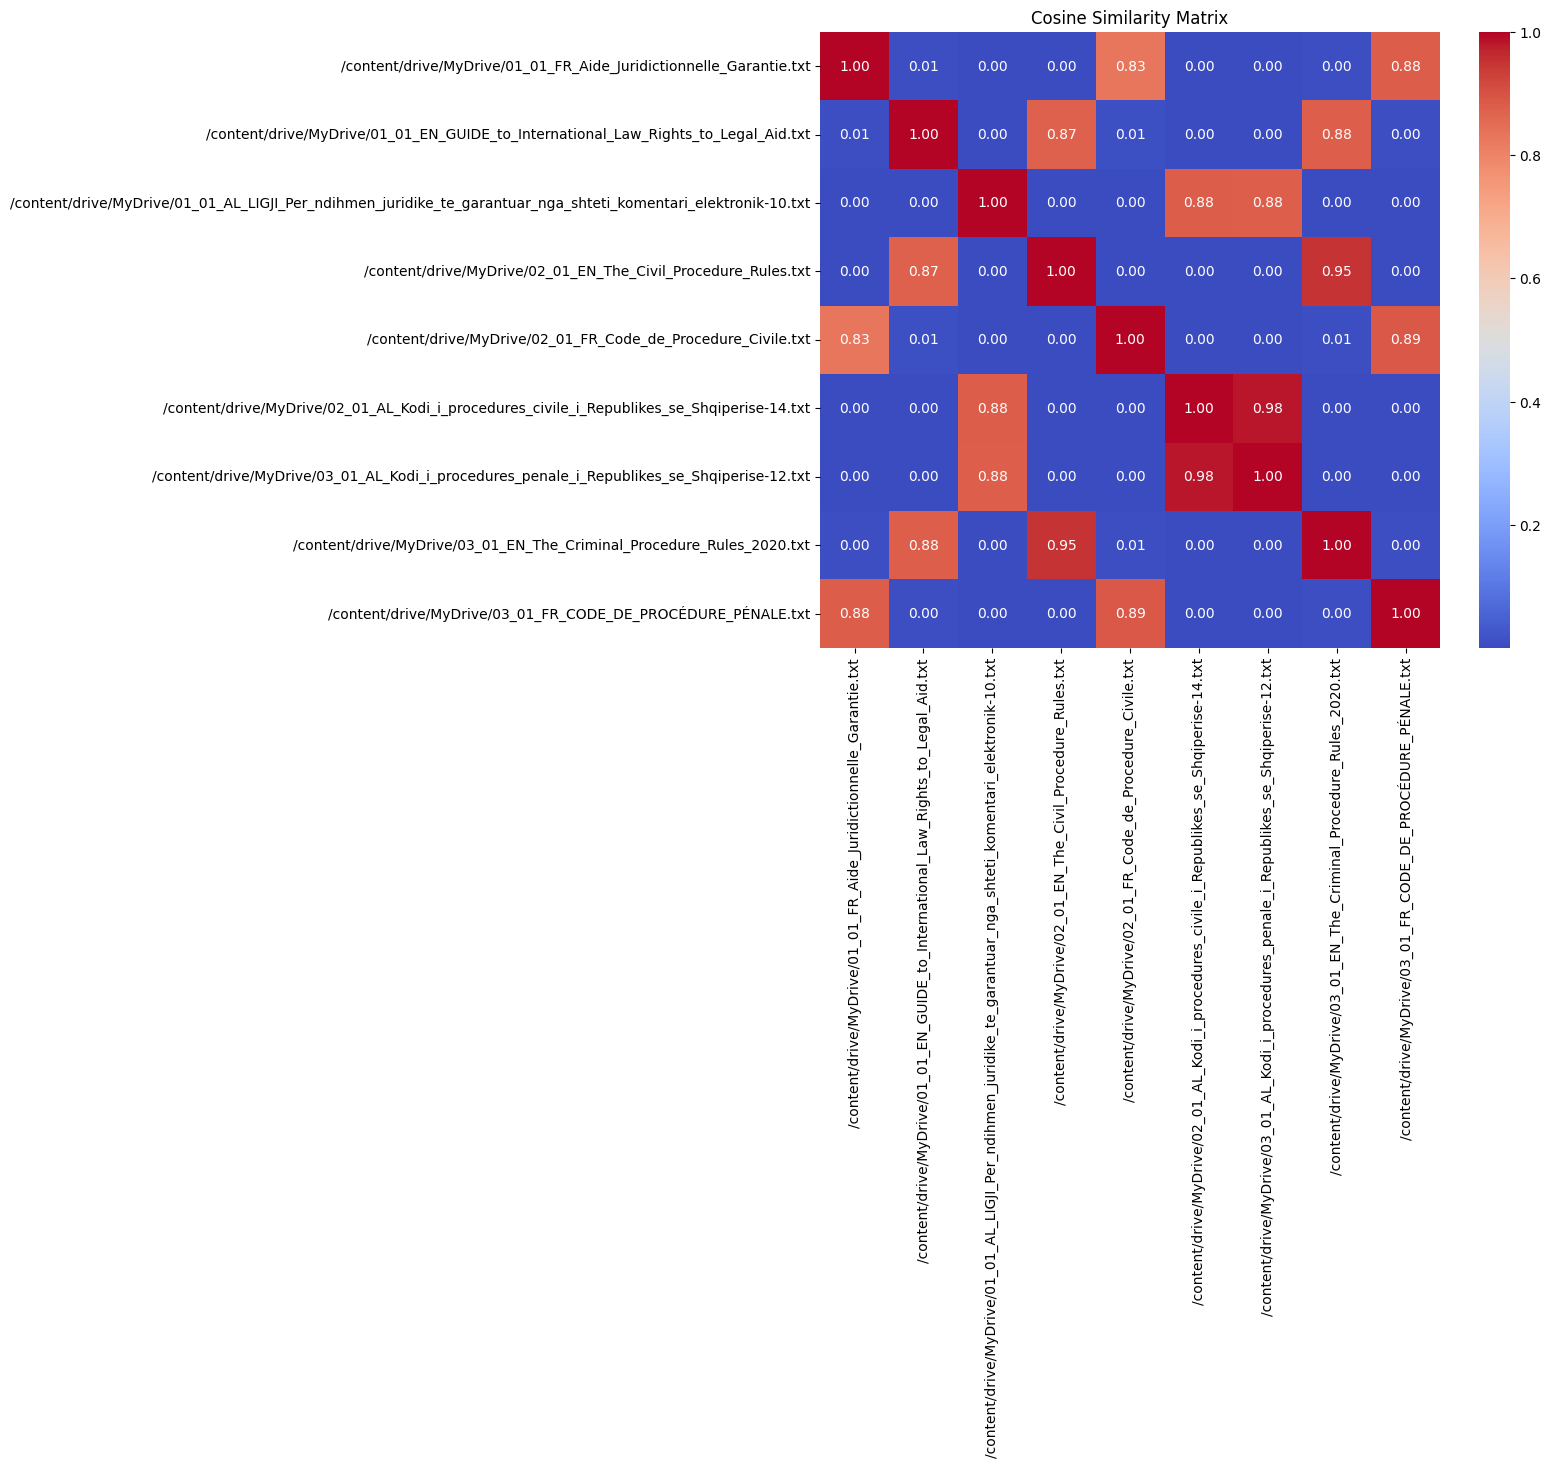

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cosine similarity matrix from the CSV file
cosine_sim_df = pd.read_csv('/content/drive/MyDrive/resultat2CosineSimilarity.csv', index_col=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cosine Similarity Matrix')
plt.show()

JACCARD

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
import os
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Download NLTK data files (first-time use)
nltk.download('punkt')

# Function to read text from a file with improved error handling
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        try:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                text = file.read()
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                text = file.read()
    return text

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/02_01_EN_The_Civil_Procedure_Rules.txt',
    '/content/drive/MyDrive/02_01_FR_Code_de_Procedure_Civile.txt',
    '/content/drive/MyDrive/02_01_AL_Kodi_i_procedures_civile_i_Republikes_se_Shqiperise-14.txt',
    '/content/drive/MyDrive/03_01_AL_Kodi_i_procedures_penale_i_Republikes_se_Shqiperise-12.txt',
    '/content/drive/MyDrive/03_01_EN_The_Criminal_Procedure_Rules_2020.txt',
    '/content/drive/MyDrive/03_01_FR_CODE_DE_PROCÉDURE_PÉNALE.txt',
]

# Read texts from all files
documents = [read_text_file(file_path) for file_path in text_file_paths]

# Vectorize the documents using binary representation
vectorizer = CountVectorizer(binary=True)
binary_matrix = vectorizer.fit_transform(documents).toarray()

# Initialize a DataFrame to store Jaccard similarities
jaccard_sim_df = pd.DataFrame(np.zeros((len(documents), len(documents))), index=text_file_paths, columns=text_file_paths)

# Compute Jaccard similarity between each pair of documents
for i in range(len(documents)):
    for j in range(len(documents)):
        if i != j:
            similarity = jaccard_score(binary_matrix[i], binary_matrix[j])
            jaccard_sim_df.iloc[i, j] = similarity

# Path to the output CSV file in Google Drive
output_csv_path = '/content/drive/MyDrive/AresultatJaccardSimilarity.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)

# Save the DataFrame to a CSV file
jaccard_sim_df.to_csv(output_csv_path, index=True)

print(f"Jaccard similarity results saved to {output_csv_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Jaccard similarity results saved to /content/drive/MyDrive/AresultatJaccardSimilarity.csv


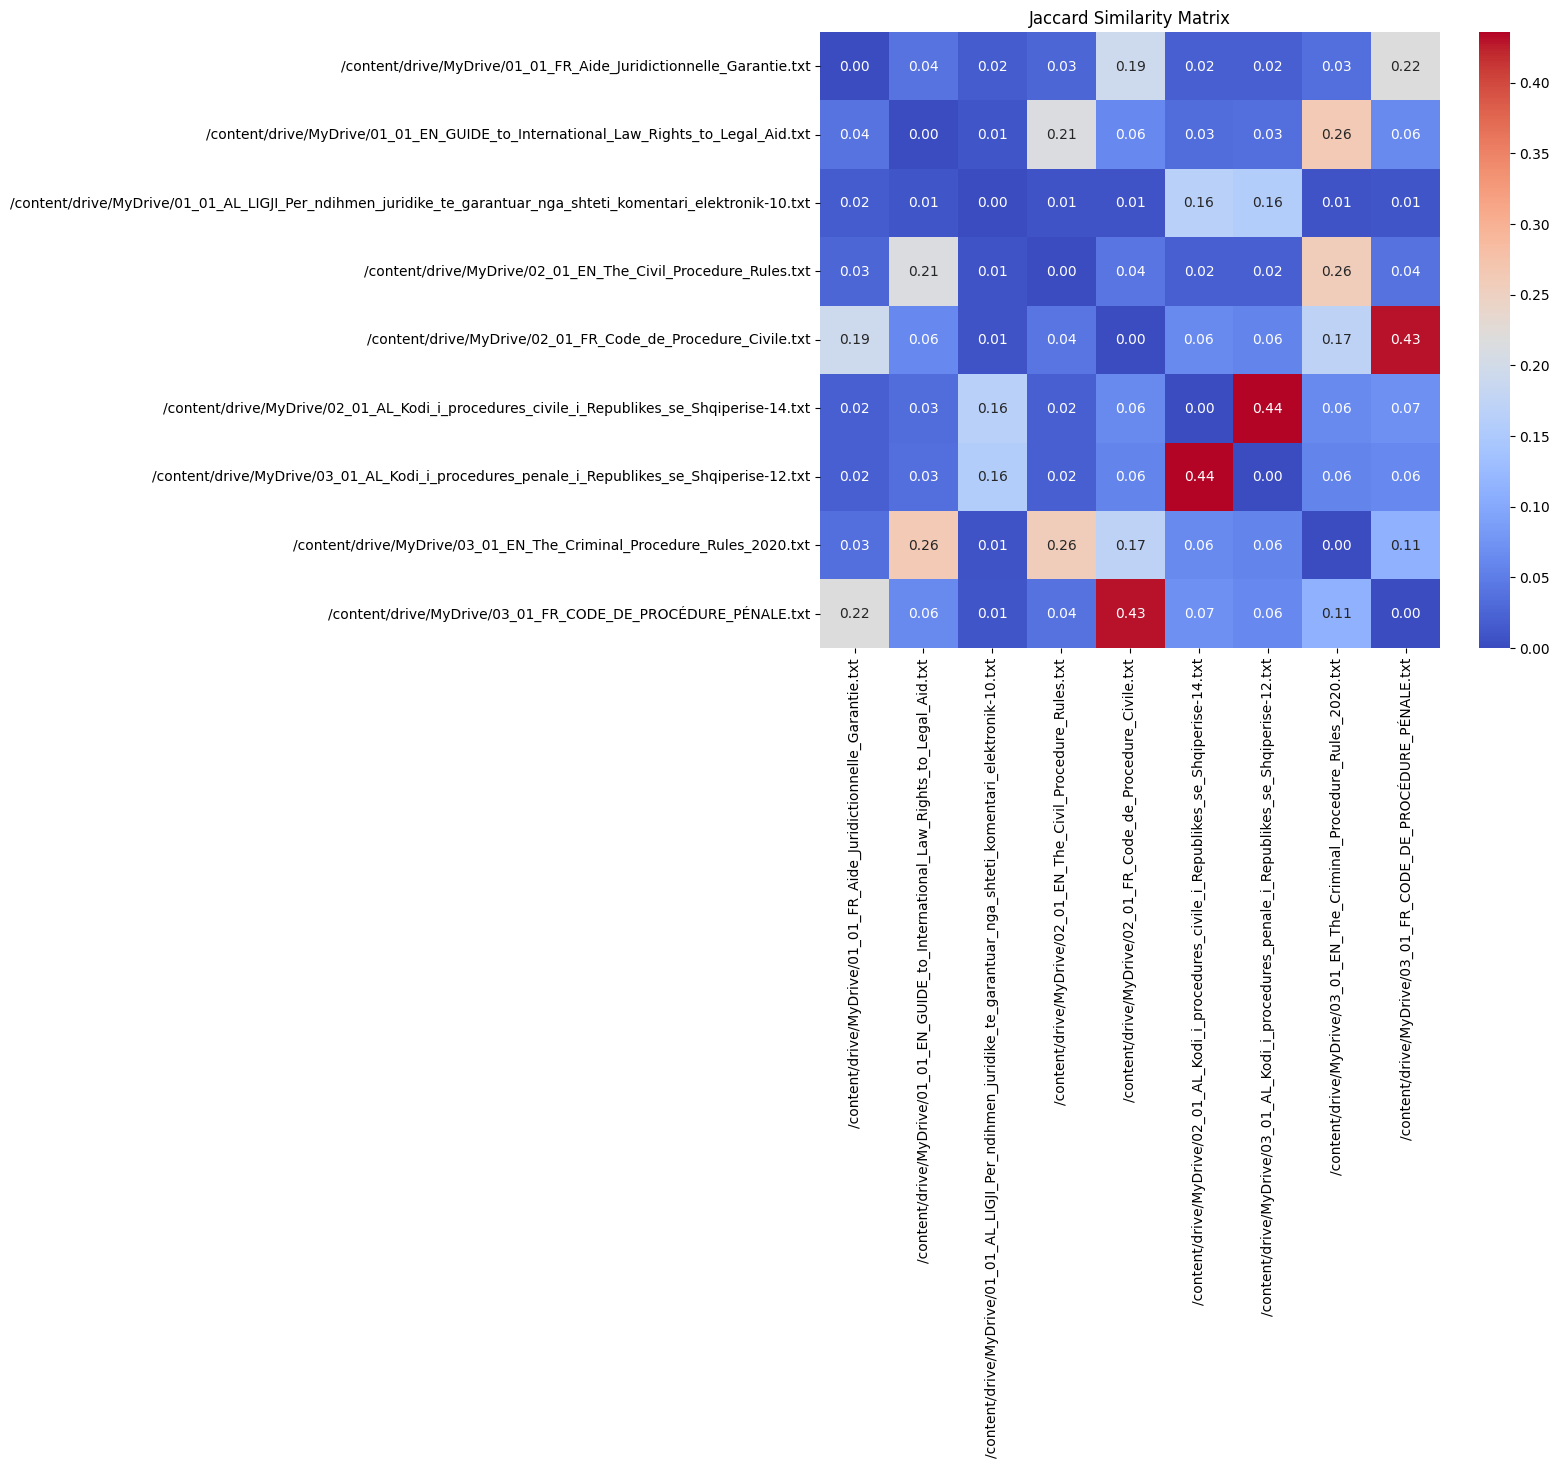

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Jaccard similarity matrix from the CSV file
jaccard_sim_df = pd.read_csv('/content/drive/MyDrive/AresultatJaccardSimilarity.csv', index_col=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_sim_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Jaccard Similarity Matrix')
plt.show()

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Ensure NLTK data is downloaded
nltk.download('punkt')

# Function to read text from a file with improved error handling
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            text = file.read()
    return text

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/02_01_EN_The_Civil_Procedure_Rules.txt',
    '/content/drive/MyDrive/02_01_FR_Code_de_Procedure_Civile.txt',
    '/content/drive/MyDrive/02_01_AL_Kodi_i_procedures_civile_i_Republikes_se_Shqiperise-14.txt',
    '/content/drive/MyDrive/03_01_AL_Kodi_i_procedures_penale_i_Republikes_se_Shqiperise-12.txt',
    '/content/drive/MyDrive/03_01_EN_The_Criminal_Procedure_Rules_2020.txt',
    '/content/drive/MyDrive/03_01_FR_CODE_DE_PROCÉDURE_PÉNALE.txt',
]

# Read each file
texts = [read_text_file(path) for path in text_file_paths]

# Labels (ensure this matches the number of text files)
# Example: Adjust the number of labels to match the number of text files
y = [0, 1, 0, 1, 0, 1, 0, 1, 1]  # Ensure labels are correctly aligned

# Check that labels and documents match in length
if len(y) != len(text_file_paths):
    raise ValueError("Number of labels does not match number of text files")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

# Define pipeline with default TF-IDF parameters
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using default parameters
    ('clf', LogisticRegression(max_iter=1000))
])

# Fit pipeline
try:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Print results
    print(f"Training Accuracy: {pipeline.score(X_train, y_train)}")
    print(f"Test Accuracy: {pipeline.score(X_test, y_test)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
except ValueError as e:
    print(f"Error occurred: {e}")

# Define parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],  # Adjusted range
    'tfidf__min_df': [1, 2],  # Adjusted range
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]  # Testing different regularization strengths
}

# Define cross-validation strategy
kf = KFold(n_splits=3)

# Run GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs=-1, verbose=3, error_score='raise')
try:
    grid_search.fit(X_train, y_train)  # Use X_train and y_train for fitting
    # Print best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
except ValueError as e:
    print(f"Error during GridSearchCV: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training Accuracy: 0.7142857142857143
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'clf__C': 0.1, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Best Score: 0.27777777777777773


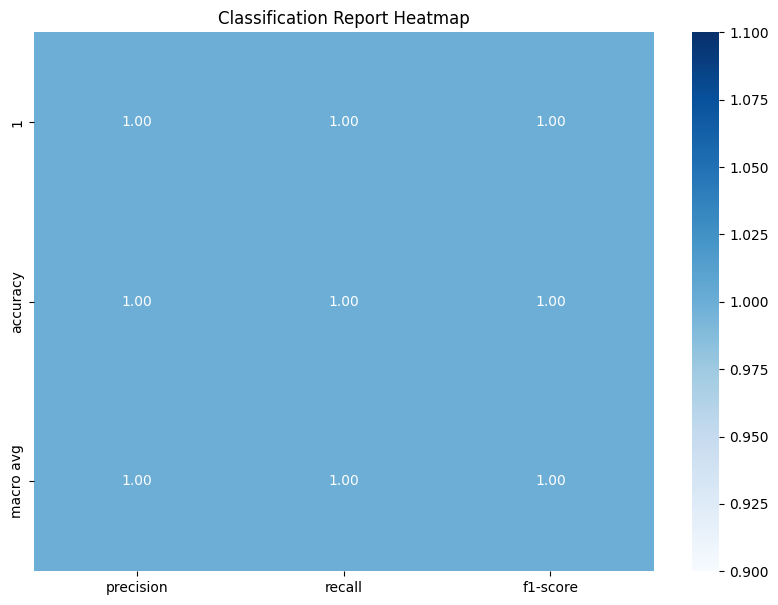

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Assuming `y_test` and `y_pred` are your actual and predicted labels
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


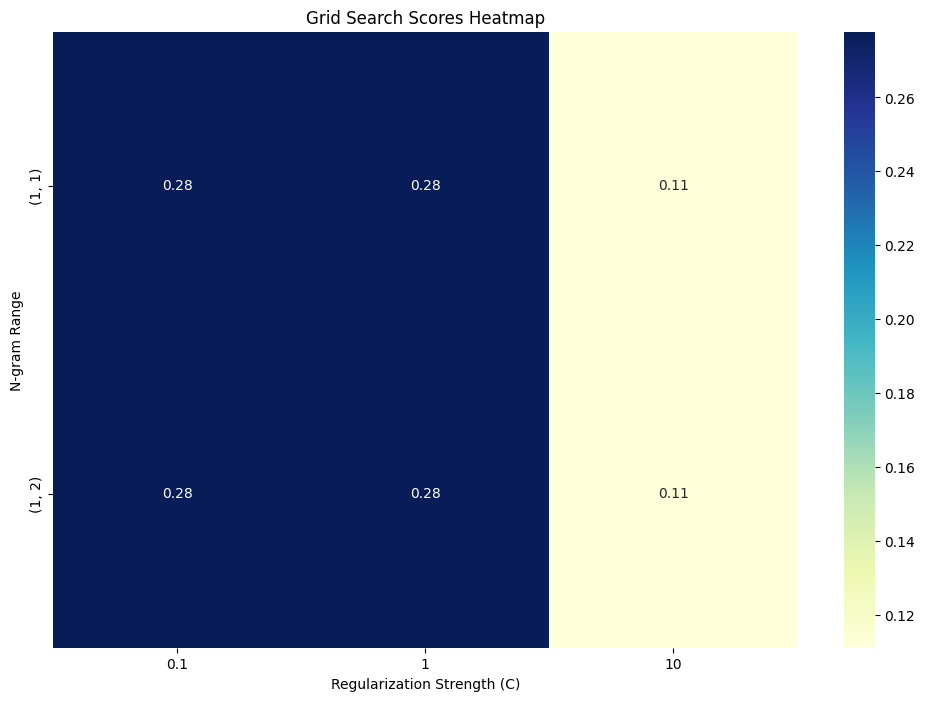

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract parameters and scores from GridSearchCV
results = grid_search.cv_results_

# Extract parameter values and scores
param_ngram_range = [f"{v}" for v in results['param_tfidf__ngram_range']]
param_C = [v for v in results['param_clf__C']]
mean_test_scores = results['mean_test_score']

# Create a matrix of mean test scores
param_ngram_range_set = sorted(set(param_ngram_range))
param_C_set = sorted(set(param_C))
scores_matrix = np.zeros((len(param_ngram_range_set), len(param_C_set)))

# Fill the scores matrix
for i, ngram_range in enumerate(param_ngram_range_set):
    for j, C in enumerate(param_C_set):
        mask = (np.array(param_ngram_range) == ngram_range) & (np.array(param_C) == C)
        scores_matrix[i, j] = np.mean(np.array(mean_test_scores)[mask])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scores_matrix, annot=True, cmap='YlGnBu', xticklabels=param_C_set, yticklabels=param_ngram_range_set)
plt.title('Grid Search Scores Heatmap')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('N-gram Range')
plt.show()


In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Ensure NLTK data is downloaded
nltk.download('punkt')

# Function to read text from a file with improved error handling
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            text = file.read()
    return text

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/02_01_EN_The_Civil_Procedure_Rules.txt',
    '/content/drive/MyDrive/02_01_FR_Code_de_Procedure_Civile.txt',
    '/content/drive/MyDrive/02_01_AL_Kodi_i_procedures_civile_i_Republikes_se_Shqiperise-14.txt',
    '/content/drive/MyDrive/03_01_AL_Kodi_i_procedures_penale_i_Republikes_se_Shqiperise-12.txt',
    '/content/drive/MyDrive/03_01_EN_The_Criminal_Procedure_Rules_2020.txt',
    '/content/drive/MyDrive/03_01_FR_CODE_DE_PROCÉDURE_PÉNALE.txt',
]

# Read each file
texts = [read_text_file(path) for path in text_file_paths]

# Labels (ensure this matches the number of text files)
y = [0, 1, 0, 1, 0, 1, 0, 1, 0]  # Example labels, replace with your own

# Alignment Check: Ensure labels and documents match in length
if len(y) != len(texts):
    raise ValueError("Number of labels does not match the number of text files")

# Split data into training and testing sets using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42, stratify=y)

# Define pipeline with default TF-IDF parameters
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using default parameters
    ('clf', LogisticRegression(max_iter=1000))
])

# Fit pipeline (aligning model to training data)
try:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Print results
    print(f"Training Accuracy: {pipeline.score(X_train, y_train)}")
    print(f"Test Accuracy: {pipeline.score(X_test, y_test)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
except ValueError as e:
    print(f"Error occurred: {e}")

# Define parameter grid for GridSearchCV (aligning hyperparameters with model goals)
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=3)

# Run GridSearchCV (aligning hyperparameter tuning with model evaluation)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs=-1, verbose=3, error_score='raise')
try:
    grid_search.fit(X_train, y_train)  # Aligning hyperparameter search with training data
    # Print best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
except ValueError as e:
    print(f"Error during GridSearchCV: {e}")

# Alignment of final model evaluation with test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Final Model Test Accuracy:", best_model.score(X_test, y_test))
print("Final Model Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training Accuracy: 0.8571428571428571
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'clf__C': 1, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Best Score: 0.7777777777777777
Final Model Test Accuracy: 1.0
Final Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



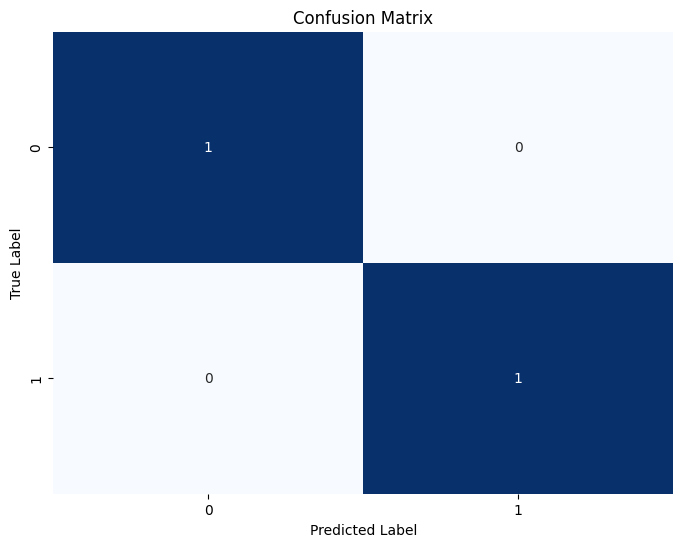

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the test set results
y_pred = pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Ensure NLTK data is downloaded
nltk.download('punkt')

# Function to read text from a file with improved error handling
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            text = file.read()
    return text

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/02_01_EN_The_Civil_Procedure_Rules.txt',
    '/content/drive/MyDrive/02_01_FR_Code_de_Procedure_Civile.txt',
    '/content/drive/MyDrive/02_01_AL_Kodi_i_procedures_civile_i_Republikes_se_Shqiperise-14.txt',
    '/content/drive/MyDrive/03_01_AL_Kodi_i_procedures_penale_i_Republikes_se_Shqiperise-12.txt',
    '/content/drive/MyDrive/03_01_EN_The_Criminal_Procedure_Rules_2020.txt',
    '/content/drive/MyDrive/03_01_FR_CODE_DE_PROCÉDURE_PÉNALE.txt',
]

# Read each file
texts = [read_text_file(path) for path in text_file_paths]

# Labels (ensure this matches the number of text files)
y = [0, 1, 0, 1, 0, 1, 0, 1, 0]  # Example labels, replace with your own

# Alignment Check: Ensure labels and documents match in length
if len(y) != len(texts):
    raise ValueError("Number of labels does not match the number of text files")

# Split data into training and testing sets using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42, stratify=y)

# Define pipeline with default TF-IDF parameters
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using default parameters
    ('clf', LogisticRegression(max_iter=1000))
])

# Fit pipeline (aligning model to training data)
try:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Print results
    print(f"Training Accuracy: {pipeline.score(X_train, y_train)}")
    print(f"Test Accuracy: {pipeline.score(X_test, y_test)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
except ValueError as e:
    print(f"Error occurred: {e}")

# Define parameter grid for GridSearchCV (aligning hyperparameters with model goals)
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=3)

# Run GridSearchCV (aligning hyperparameter tuning with model evaluation)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs=-1, verbose=3, error_score='raise')
try:
    grid_search.fit(X_train, y_train)  # Aligning hyperparameter search with training data
    # Print best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
except ValueError as e:
    print(f"Error during GridSearchCV: {e}")

# Alignment of final model evaluation with test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Final Model Test Accuracy:", best_model.score(X_test, y_test))
print("Final Model Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training Accuracy: 0.8571428571428571
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'clf__C': 1, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Best Score: 0.7777777777777777
Final Model Test Accuracy: 1.0
Final Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



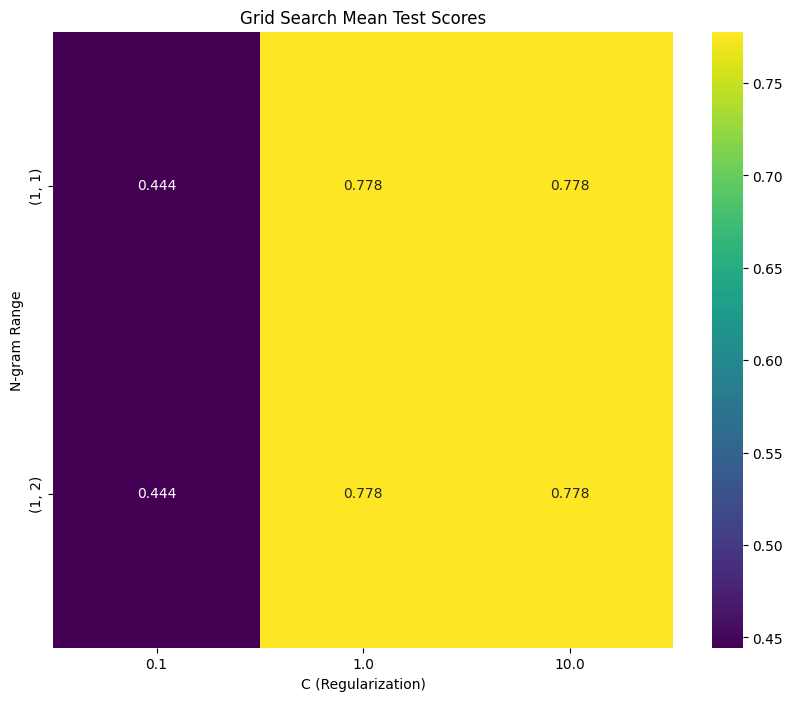

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame containing the grid search results

# Step 1: Select only numeric columns from the results DataFrame
numeric_results = results.select_dtypes(include=[np.number])

# Step 2: Merge these numeric columns back with the parameter columns
numeric_results = pd.concat([results[['param_tfidf__ngram_range', 'param_clf__C']], numeric_results], axis=1)

# Step 3: Aggregate by taking the mean of duplicate entries
results_aggregated = numeric_results.groupby(['param_tfidf__ngram_range', 'param_clf__C']).mean().reset_index()

# Step 4: Pivot the table to format it for heatmap visualization
pivot_table = results_aggregated.pivot(index='param_tfidf__ngram_range', columns='param_clf__C', values='mean_test_score')

# Step 5: Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Mean Test Scores')
plt.xlabel('C (Regularization)')
plt.ylabel('N-gram Range')
plt.show()


Affinage

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from google.colab import drive
from collections import Counter
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Ensure NLTK data is downloaded
nltk.download('punkt')

# Function to read text from a file with improved error handling
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            text = file.read()
    return text

# List of paths to your text files
text_file_paths = [
    '/content/drive/MyDrive/01_01_FR_Aide_Juridictionnelle_Garantie.txt',
    '/content/drive/MyDrive/01_01_EN_GUIDE_to_International_Law_Rights_to_Legal_Aid.txt',
    '/content/drive/MyDrive/01_01_AL_LIGJI_Per_ndihmen_juridike_te_garantuar_nga_shteti_komentari_elektronik-10.txt',
    '/content/drive/MyDrive/02_01_EN_The_Civil_Procedure_Rules.txt',
    '/content/drive/MyDrive/02_01_FR_Code_de_Procedure_Civile.txt',
    '/content/drive/MyDrive/02_01_AL_Kodi_i_procedures_civile_i_Republikes_se_Shqiperise-14.txt',
    '/content/drive/MyDrive/03_01_AL_Kodi_i_procedures_penale_i_Republikes_se_Shqiperise-12.txt',
    '/content/drive/MyDrive/03_01_EN_The_Criminal_Procedure_Rules_2020.txt',
    '/content/drive/MyDrive/03_01_FR_CODE_DE_PROCÉDURE_PÉNALE.txt',
]

# Read each file
texts = [read_text_file(path) for path in text_file_paths]

# Labels (ensure this matches the number of text files)
y = [0, 1, 0, 1, 0, 1, 0, 1, 0]  # Example labels, replace with your own

# Alignment Check: Ensure labels and documents match in length
if len(y) != len(texts):
    raise ValueError("Number of labels does not match the number of text files")

# Split data into training and testing sets using stratified splitting
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in training and test sets
print(f"Training labels distribution: {Counter(y_train)}")
print(f"Test labels distribution: {Counter(y_test)}")

# Define pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using default parameters
    ('clf', LogisticRegression(max_iter=1000))
])

# Fit pipeline (aligning model to training data)
try:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Print results
    print(f"Training Accuracy: {pipeline.score(X_train, y_train)}")
    print(f"Test Accuracy: {pipeline.score(X_test, y_test)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
except ValueError as e:
    print(f"Error occurred: {e}")

# Define parameter grid for GridSearchCV (aligning hyperparameters with model goals)
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=3)

# Run GridSearchCV (aligning hyperparameter tuning with model evaluation)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, n_jobs=-1, verbose=3, error_score='raise')
try:
    grid_search.fit(X_train, y_train)  # Aligning hyperparameter search with training data
    # Print best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
except ValueError as e:
    print(f"Error during GridSearchCV: {e}")

# Alignment of final model evaluation with test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Final Model Test Accuracy:", best_model.score(X_test, y_test))
print("Final Model Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training labels distribution: Counter({0: 4, 1: 3})
Test labels distribution: Counter({0: 1, 1: 1})


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training Accuracy: 0.8571428571428571
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'clf__C': 1, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Best Score: 0.7777777777777777
Final Model Test Accuracy: 1.0
Final Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Example labels (ensure these match your data)
true_labels = [0, 1, 1]  # Replace these with actual labels for your data

# Split data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, true_labels, test_size=0.3, random_state=42)

# Initialize model
model = RandomForestClassifier()

# Train model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))

# Fine-Tuning (Affinage) using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model for predictions
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)
print("Best Model Classification Report:\n", classification_report(y_test, best_predictions, zero_division=1))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       1.0
           1       0.00      1.00      0.00       0.0

    accuracy                           1.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       1.0
           1       0.00      1.00      0.00       0.0

    accuracy                           1.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Example labels (ensure these match your data)
true_labels = [0, 1, 1]  # Replace these with actual labels for your data

# Split data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, true_labels, test_size=0.3, random_state=42)

# Initialize model
model = RandomForestClassifier()

# Train model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))

# Fine-Tuning (Affinage) using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model for predictions
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)
print("Best Model Classification Report:\n", classification_report(y_test, best_predictions, zero_division=1))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       1.0
           1       0.00      1.00      0.00       0.0

    accuracy                           1.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       1.0
           1       0.00      1.00      0.00       0.0

    accuracy                           1.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0

